# Project Manager's Dilemma
## Author: Snigdhayan Mahanta

From a quantitative viewpoint one can say that a project manager is constantly trying to optimize the project scope based on the constraints that are either defined by the system requirements or by resource related constraints (e.g., budget, personnel, etc.). A project manager has to constantly adjust project parameters and manage expectations of stakeholders to ensure the success of a project. Thanks to agile practises the challenges faced by a project manager have changed and let us consider a few of them.

A project can have too few requirements (not well-defined) or too many requirements (overconstrained). In either case the success of the project is in jeopardy. From a mathematical viewpoint an optimization problem can have too few constraints (no finite solution exists) or too many constraints (no feasible solution exists).

I demonstrated this fact in a small experiment below. Let us consider optimization problems with 50 variables. I randomly created 100 optimization problmes with 50 variables and a varying number of constraints (between 5 and 100 with an increment of 5). Then I checked what percentage of them admit an optimal solution. Finally, I plotted the percentage of cases, where an optimal solution exists, as a function of the number of constraints. The expected pattern is clearly noticeable.

In [1]:
# Load library 'lpsolve'
library(lpSolve)

In [2]:
# Define the experiment as a function
experiment <- function(trials, n_variables, n_constraints) {
  results <- integer(trials)
  for (i in c(1:trials)) {
    # Create a random optimization problem for the given number of variables and constraints
    f.obj <- sample(seq.int(-10,10), size = n_variables, replace = TRUE)
    vector <- sample(seq.int(-10,10), size = n_variables*n_constraints, replace = TRUE)
    f.con <- matrix(vector, ncol = n_variables, byrow = TRUE)
    f.dir <- sample(c("==", "<=", ">="), size = n_constraints, replace = TRUE)
    f.rhs <- sample(seq.int(-10,10), size = n_constraints, replace = TRUE)
    
    # Run solver without integrality requirement
    res_int <- lp("max", f.obj, f.con, f.dir, f.rhs)
    soln <- res_int$solution
    if (res_int$status==0) {results[i] <- res_int$objval}
    else {results[i] <- NA}
  }
  
  # Compute and return the percentage of cases, where an optimum exists
  valid_results <- results[!is.na(results)]
  return(length(valid_results)/trials*100)
}

In [3]:
# Define the experiment parameters
trials <- 100 # no. of trials
n_variables <- 50 # no. of variables
n_constraints_list <- seq.int(from = 5, to = 100, by = 5) # no. of constraints varying between 5 and 100

In [4]:
# Conduct the experiment and plot the results
percentages <- integer(length(n_constraints_list))
for (n in c(1:length(n_constraints_list))) {
  percentages[n] <- experiment(trials, n_variables, n_constraints_list[n])
}

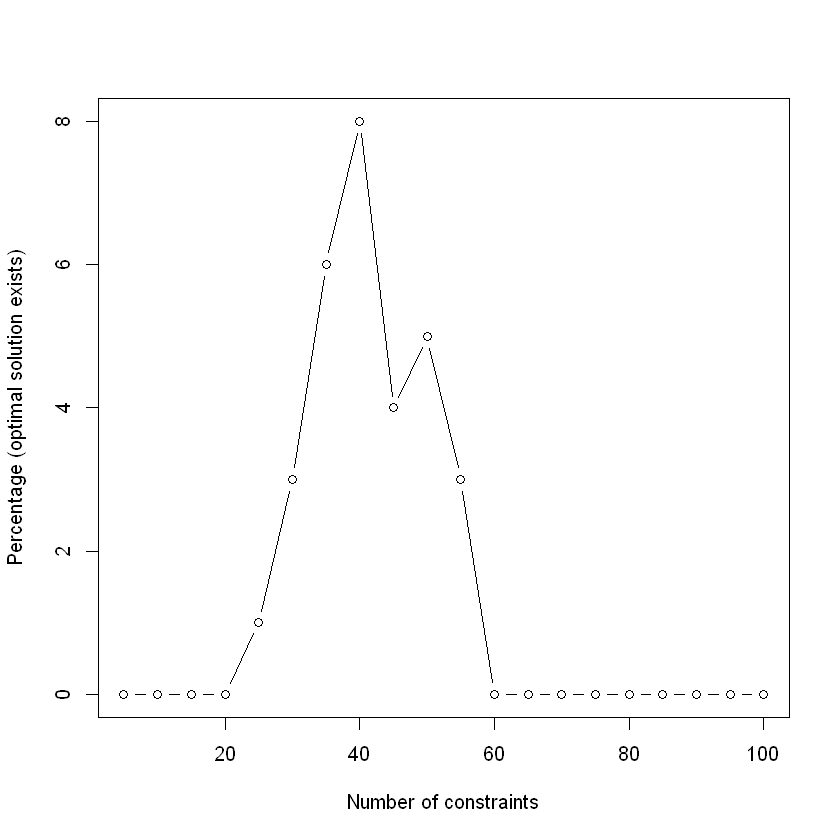

In [5]:
# Plot the results
plot(x = n_constraints_list, 
     y = percentages, 
     type = "b", 
     xlab = "Number of constraints", 
     ylab = "Percentage (optimal solution exists)")

Initially, there are too few constraints for the system to admit a finite optimal solution. In the middle there are a few cases, where a finite optimal solution exists. Note that the percentage is still small and in most cases the system still does not admit an optimal solution. Finally, beyond a certain number of constraints the system gets overconstrained and admits no feasible solution. 